In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use(["science"])


def recursion(j,Nprec, Bs, Nlevel, states,N=5,Ninit=0,periodic = False): # algorithm from the report
    Bnew = 0            
    Nnew = Nprec        
    Bsnext = Bs.copy()
    Bsnext.append(Bnew)
    if j == N-1:
        Bsnext.append(Ninit)
        if periodic:
            if Nnew == Ninit:
                states.append(Bsnext)
        else:
            states.append(Bsnext)

    else:
        recursion(j+1,Nnew,Bsnext,Nlevel,states,N,Ninit,periodic)

    Bnew = 1
    Nnew = Nprec + (-1)**j
    if Nnew >= 0 and Nnew <=Nlevel:
        Bsnext = Bs.copy()
        Bsnext.append(Bnew)
        if j == N-1:
            Bsnext.append(Ninit)
            if periodic:
                if Nnew == Ninit:
                    states.append(Bsnext)
            else:
                states.append(Bsnext)
        else:
            recursion(j+1,Nnew,Bsnext,Nlevel,states,N,Ninit,periodic)


def getAllStatesPeriodic(N = 4,S = 1):      #call recursion for each possible Sinit
    states=[]

    Nlevel = int(2*S)
    for Ninit in range(0,Nlevel+1):
        recursion(0,Ninit,[],Nlevel,states,N,Ninit, True)

    return np.array(states)


def getField(Sinit,state):                  #transform |Sinit,{b}> to {s_i}
    field = np.zeros(len(state)+1)
    field[0] = Sinit
    Scurrent = Sinit
    for i,x in enumerate(state):
        Snext = Scurrent + (-1)**i * x
        field[i+1] = Snext
        Scurrent = Snext
    return field

def getAllFields(states):                   #transform all |Sinit,{b}> to {s_i}
    fields = np.zeros((len(states),len(states[0])))
    for i, state in enumerate(states):
        fields[i] = getField(state[-1]-S, state[:-1])
    return fields



def stateToFermion(state):                  #transform |Sinit,{b}> to {nF_i}
    N = len(state)-1
    x = np.arange(N)%2
    return (state[:-1]+x) %2


def statesToFermions(states):               #transform all |Sinit,{b}> to {nF_i}
    dim = len(states)
    N = len(states[0])-1

    x = np.repeat( [np.arange(N)%2], dim, axis=0)

    return((states[:,:-1]+x) %2)





N=6
S=1


k = 0

states = getAllStatesPeriodic(N,S)
fields = getAllFields(states)
print(fields[k])
fermions = statesToFermions(states)
print(fermions[k])

[-1. -1. -1. -1. -1. -1. -1.]
[0 1 0 1 0 1]


In [19]:
def printConfig(fermion,spin):
    color = ["#0072BD", "#D95319", "#EDB120", "#7E2F8E", "#77AC30", "#4DBEEE", "#A2142F"]
    N = len(fermion)
    xs = np.arange(N+1)-0.5
    xfnot = np.squeeze(np.argwhere(fermion-1)) 
    xf = np.squeeze(np.argwhere(fermion)) 

    cm = 1 / 2.54
    fig = plt.figure(figsize=(8 * cm, 3 * cm), dpi=300)
    #ax = plt.gca()
    plt.hlines(1,-1,N,'k','--',linewidth=0.2)
    plt.hlines(0,-1,N,'k','--',linewidth=0.2)
    plt.hlines(-1,-1,N,'k','--',linewidth=0.2)
    plt.plot(xs,spin,color=color[2])

    plt.plot(xf,np.zeros(len(xf)), "o",
            markersize=8,
            markeredgewidth=1.5,
            markeredgecolor=color[1],
            markerfacecolor=color[1])

    plt.plot(xfnot,np.zeros(len(xfnot)),"o",
            markersize=8,
            markeredgewidth=1.5,
            markeredgecolor=color[0],
            markerfacecolor=(1, 1, 0, 0.0))
    
    plt.rcParams["font.size"] = "12"
    plt.ylabel(r"$s^z_n$", fontsize=12)
    plt.xlabel(r"$n$", fontsize=12)
    plt.xticks(range(N))
    plt.xlim([-0.5,N-0.5])
    plt.ylim([-1.5,1.5])
    plt.tick_params(left = False,top=False,right=False) 
    plt.minorticks_off()

    plt.show()

In [109]:
def printsubConfig(fermion,spin,ax,k=0,posx = 0,posy=0):
    color = ["#0072BD", "#D95319", "#EDB120", "#7E2F8E", "#77AC30", "#4DBEEE", "#A2142F"]
    N = len(fermion)
    xs = np.arange(N+1)-0.5
    xfnot = np.squeeze(np.argwhere(fermion-1)) 
    xf = np.squeeze(np.argwhere(fermion)) 

    cm = 1 / 2.54
    #fig = plt.figure(figsize=(8 * cm, 3 * cm), dpi=300)
    #ax = plt.gca()
    ax.hlines(1,-1,N,'k','--',linewidth=0.2)
    ax.hlines(0,-1,N,'k','--',linewidth=0.2)
    ax.hlines(-1,-1,N,'k','--',linewidth=0.2)
    ax.plot(xs,spin,color=color[2])

    ax.plot(xf,np.zeros(len(xf)), "o",
            markersize=8,
            markeredgewidth=1.5,
            markeredgecolor=color[1],
            markerfacecolor=color[1])

    ax.plot(xfnot,np.zeros(len(xfnot)),"o",
            markersize=8,
            markeredgewidth=1.5,
            markeredgecolor=color[0],
            markerfacecolor=(1, 1, 0, 0.0))
    
    
    ax.set_ylabel(r"$s^z_n$", fontsize=12)
    ax.set_xlabel(r"$n$", fontsize=12)
    ax.set_xticks(range(N))
    ax.set_yticks([-1,0,1])
    ax.set_xlim([-0.5,N-0.5])
    ax.set_ylim([-1.5,1.5])
    
    #ax.set_xtick_params(left = False,top=False,right=False) 
    ax.minorticks_off()
    ax.xaxis.set_tick_params(top=False)
    ax.yaxis.set_tick_params(right=False)

    if posy==0:
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 

    if posx==1:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position('right') 


    ax.text(4, 0.5, r"$|\phi_{" + str(k) + r"}\rangle$")#, bbox = dict(facecolor = 'white', alpha = 0.5)) 



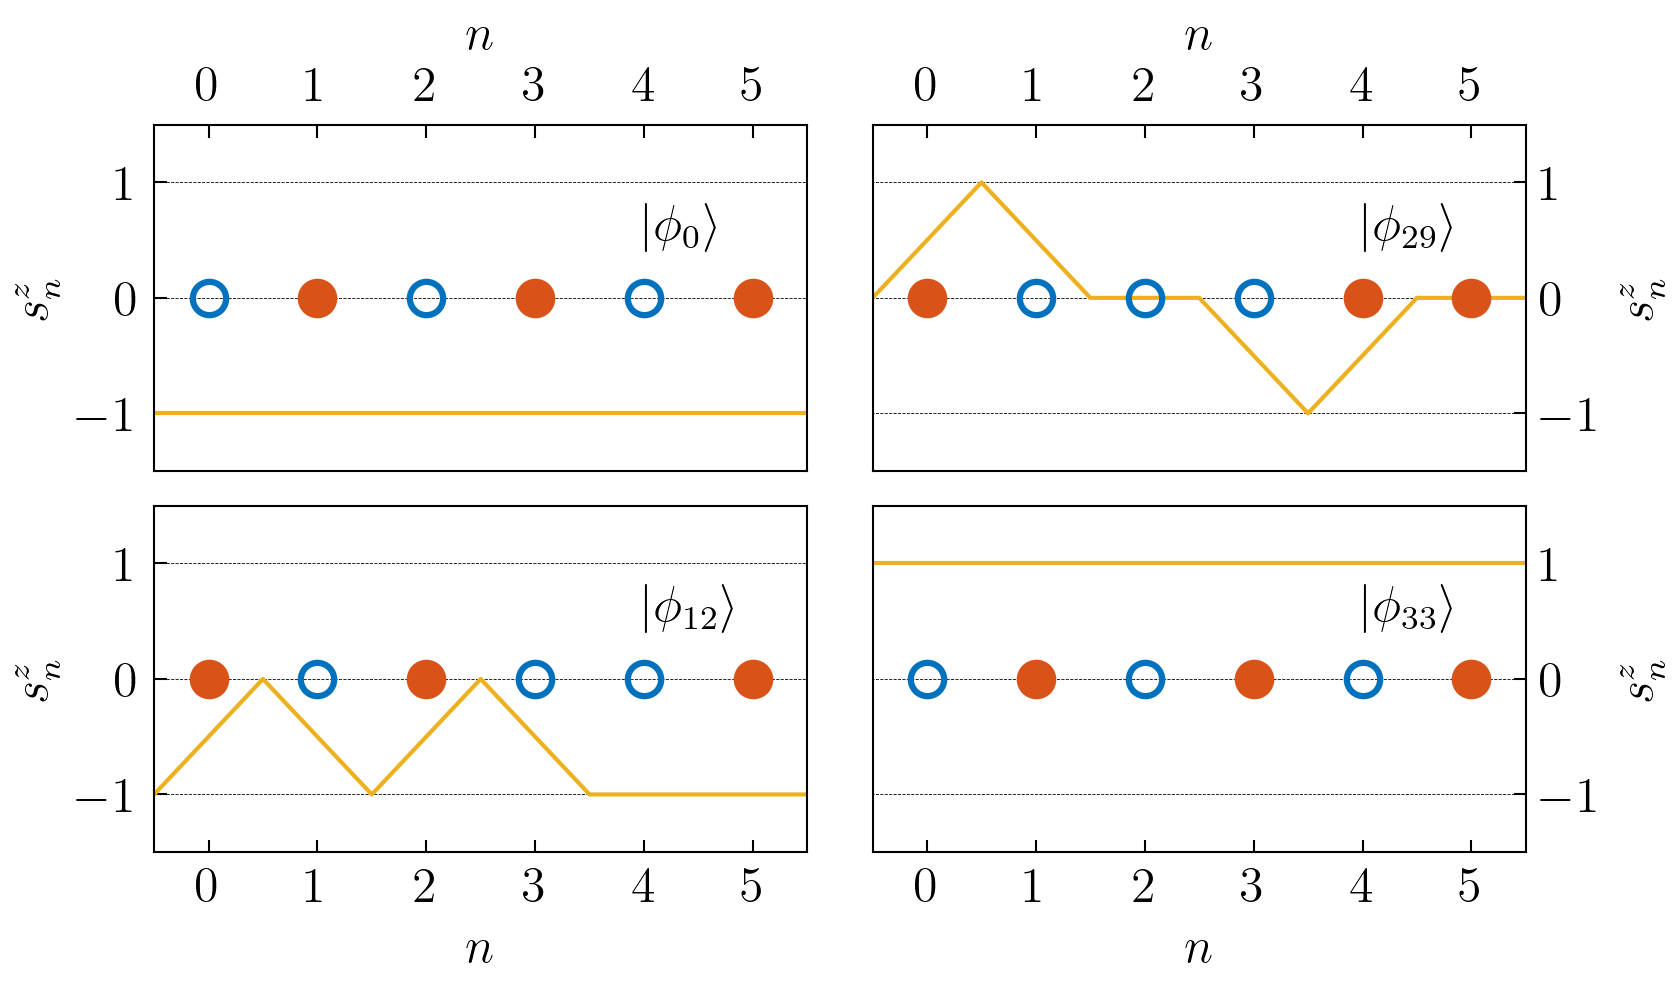

In [115]:
cm = 1 / 2.54
maxsize = 5.9
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(1.*maxsize, 8 * cm),dpi=300)

#fig.tight_layout(pad=0.0)
plt.subplots_adjust(wspace=0.1, 
                    hspace=0.1)

k=0
printsubConfig(fermions[k],fields[k],ax1,k,0,0)
k=29
printsubConfig(fermions[k],fields[k],ax2,k,1,0)
k=12
printsubConfig(fermions[k],fields[k],ax3,k,0,1)
k=33
printsubConfig(fermions[k],fields[k],ax4,k,1,1)


plt.rcParams["font.size"] = "12"
#plt.savefig("IMG/states.png", bbox_inches="tight")
plt.show()